# 1.1 차량의 가로, 세로 길이 측정하기 🚍📏

## Step 1. OVISION Earth에서 차량 추론 결과를 다운로드한다.

1. 차량 추론 프로젝트 클릭
1. 우상단 GeoJSON 다운로드 버튼 클릭
1. Colab에 업로드

😢 추론이 잘 안 되는 경우 data 폴더에 위치한 vehicle_detection.geojson 활용

## Step 2. GeoPandas로 차량 추론 결과를 불러온다.

In [1]:
import geopandas as gpd

gdf = gpd.read_file("data/vehicle_detection_dunsan.geojson")
gdf.explore()

## Step 3. 추론 결과의 좌표계를 살펴본다.

In [2]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Step 4. 추론 결과의 좌표계를 적절한 투영좌표계로 변환한다.

In [3]:
utm_crs = gdf.estimate_utm_crs()
utm_crs

<Projected CRS: EPSG:32652>
Name: WGS 84 / UTM zone 52N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°E and 132°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Japan. North Korea. Russian Federation. South Korea.
- bounds: (126.0, 0.0, 132.0, 84.0)
Coordinate Operation:
- name: UTM zone 52N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
gdf_utm = gdf.to_crs(utm_crs)
gdf_utm.crs

<Projected CRS: EPSG:32652>
Name: WGS 84 / UTM zone 52N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°E and 132°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Japan. North Korea. Russian Federation. South Korea.
- bounds: (126.0, 0.0, 132.0, 84.0)
Coordinate Operation:
- name: UTM zone 52N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Step 5. 각 변의 길이를 구한다.

In [5]:
from shapely.geometry import Point

def get_length_list(geom):
    coords = list(geom.exterior.coords)
    length_list = list()
    for i in range(0, len(coords) - 1):
        p1 = Point(coords[i])
        p2 = Point(coords[i + 1])
        distance = p1.distance(p2)
        length_list.append(distance)
    return length_list

gdf_utm["length_list"] = gdf_utm["geometry"].apply(get_length_list)
gdf_utm

,geometry,length_list
0,"POLYGON ((354632.077 4025859.835, 354632.021 4...","[6.16275636618395, 2.8525075048026673, 6.16275..."
1,"POLYGON ((354628.245 4026049.111, 354628.444 4...","[5.666509153096164, 2.902072463968294, 5.66650..."
2,"POLYGON ((354622.842 4025967.624, 354622.779 4...","[5.8836022754837884, 2.790041406202263, 5.8836..."
3,"POLYGON ((354609.514 4025676.241, 354609.672 4...","[5.876684305533401, 2.7580187546809705, 5.8766..."
4,"POLYGON ((354626.915 4026167.065, 354626.905 4...","[6.4629751422725175, 3.000968378230657, 6.4629..."
...,...,...
1205,"POLYGON ((354202.056 4025828.488, 354203.287 4...","[5.392535151630624, 2.959575396365291, 5.39253..."
1206,"POLYGON ((354559.888 4026017.92, 354559.846 40...","[4.852653841316128, 2.0831750093078023, 4.8526..."
1207,"POLYGON ((354417.62 4026006.835, 354417.609 40...","[6.072058374661079, 2.4902322314530223, 6.0720..."
1208,"POLYGON ((353612.821 4026314.946, 353616.927 4...","[7.5255790844230885, 3.100970235569441, 7.5255..."


## Step 6. 각 변의 길이 중 최대(전장), 최소(전폭)를 구한다.

In [6]:
gdf_utm["vehicle_length"] = gdf_utm["length_list"].apply(lambda x: max(x))
gdf_utm["vehicle_width"] = gdf_utm["length_list"].apply(lambda x: min(x))
gdf_utm

,geometry,length_list,vehicle_length,vehicle_width
0,"POLYGON ((354632.077 4025859.835, 354632.021 4...","[6.16275636618395, 2.8525075048026673, 6.16275...",6.162756,2.852505
1,"POLYGON ((354628.245 4026049.111, 354628.444 4...","[5.666509153096164, 2.902072463968294, 5.66650...",5.666509,2.902072
2,"POLYGON ((354622.842 4025967.624, 354622.779 4...","[5.8836022754837884, 2.790041406202263, 5.8836...",5.883602,2.790040
3,"POLYGON ((354609.514 4025676.241, 354609.672 4...","[5.876684305533401, 2.7580187546809705, 5.8766...",5.876684,2.758019
4,"POLYGON ((354626.915 4026167.065, 354626.905 4...","[6.4629751422725175, 3.000968378230657, 6.4629...",6.462975,3.000966
...,...,...,...,...
1205,"POLYGON ((354202.056 4025828.488, 354203.287 4...","[5.392535151630624, 2.959575396365291, 5.39253...",5.392535,2.959575
1206,"POLYGON ((354559.888 4026017.92, 354559.846 40...","[4.852653841316128, 2.0831750093078023, 4.8526...",4.852654,2.083174
1207,"POLYGON ((354417.62 4026006.835, 354417.609 40...","[6.072058374661079, 2.4902322314530223, 6.0720...",6.072058,2.490230
1208,"POLYGON ((353612.821 4026314.946, 353616.927 4...","[7.5255790844230885, 3.100970235569441, 7.5255...",7.525580,3.100969


## Step 7. 버스 차고지에서 대형버스 전장의 평균, 표준편차를 구한다.

In [7]:
gdf_bus = gpd.read_file("data/vehicle_detection_buses.geojson")
gdf_bus_utm = gdf_bus.to_crs(gdf_bus.estimate_utm_crs())
gdf_bus_utm["length_list"] = gdf_bus_utm["geometry"].apply(get_length_list)
gdf_bus_utm["vehicle_length"] = gdf_bus_utm["length_list"].apply(lambda x: max(x))
gdf_bus_utm["vehicle_width"] = gdf_bus_utm["length_list"].apply(lambda x: min(x))
gdf_bus_utm

,geometry,length_list,vehicle_length,vehicle_width
0,"POLYGON ((356880.012 4030625.06, 356877.565 40...","[2.832367849514756, 11.498615175985003, 2.8323...",11.498615,2.832366
1,"POLYGON ((356873.927 4030622.792, 356871.425 4...","[2.997327871203146, 10.386529745115599, 2.9973...",10.386533,2.997320
2,"POLYGON ((356860.233 4030645.084, 356858.086 4...","[2.6469178656071177, 9.20055865999645, 2.64691...",9.200559,2.646916
3,"POLYGON ((356869.235 4030651.286, 356866.9 403...","[2.8534588790167943, 8.881388602435104, 2.8534...",8.881392,2.853451
4,"POLYGON ((356857.84 4030642.528, 356855.397 40...","[3.0326374702487398, 10.16180003341059, 3.0326...",10.161800,3.032636
5,"POLYGON ((356863.572 4030647.183, 356861.078 4...","[3.0527931284591796, 9.75532862429105, 3.05279...",9.755329,3.052791
6,"POLYGON ((356851.952 4030637.912, 356849.37 40...","[3.1346161222545863, 9.341703659481984, 3.1346...",9.341704,3.134614


In [8]:
bus_length_mean, bus_length_std = gdf_bus_utm["vehicle_length"].mean(), gdf_bus_utm["vehicle_length"].std()

print(bus_length_mean)
print(bus_length_std)

9.889418803337094
0.8868901681583445


## Step 8. 추론 결과로부터 대형버스 전장의 평균±표준편차에 해당하는 차량만 선택한다.

In [9]:
def determine_is_bus(x):
    x_length = x["vehicle_length"]
    
    sigma_multiplier = 3.0
    
    a = x_length >= bus_length_mean - sigma_multiplier * bus_length_std
    b = x_length <= bus_length_mean + sigma_multiplier * bus_length_std
    return True if a and b else False

gdf_utm["is_bus"] = gdf_utm.apply(determine_is_bus, axis=1)


In [10]:
gdf_utm.explore(column="is_bus", cmap="rainbow")

<function matplotlib.pyplot.show(close=None, block=None)>

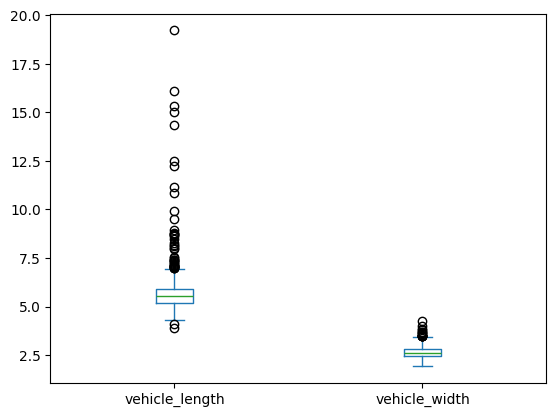

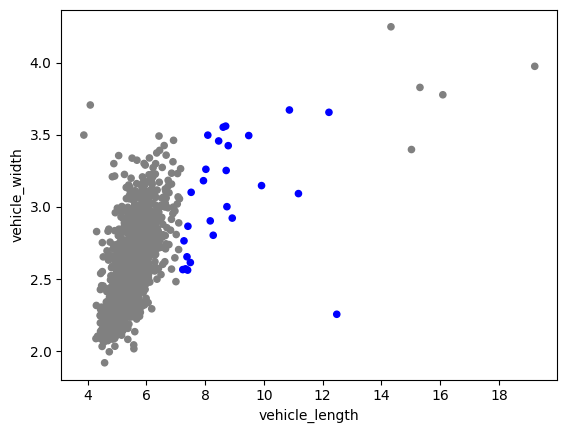

In [11]:
from matplotlib import pyplot as plt

gdf_utm.plot.box()
gdf_utm.plot.scatter(x="vehicle_length", y="vehicle_width", c=gdf_utm["is_bus"].apply(lambda x: "Blue" if x else "Gray"))
plt.show